In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import importlib.util
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)
    
from data_handle.data_load import ForexDataLoad
from data_handle.quick_look import ForexQuickLook
from data_handle.data_clean import ForexDataClean

from features.indicators import ForexMomentumIndicators, ForexTrendIndicators, ForexVolumeIndicators, ForexVolatilityIndicators
from features.tsfresh_extractor import ForexTSFeatures

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = ForexDataLoad(file_path = '../data/xauaud.csv').data

FOREX DATA LOADER
 Available Fuctions 
1 load_csv 
2 load_dataframe 
3 load_from_database
Data loaded successfully!
Shape: (38217, 5)



FOREX QUICK LOOK
 Available Fuctions 
1 display_info 
2 check_missing_values_and_duplicates 
3 plot_candlestick 
4 plot_time_series 
5 get_summary
DATASET INFORMATION

1. BASIC INFO:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38217 entries, 2017-04-24 01:00:00 to 2025-09-05 20:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    38217 non-null  float64
 1   high    38217 non-null  float64
 2   low     38216 non-null  float64
 3   close   38217 non-null  float64
 4   volume  38217 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 1.7 MB
None

2. FIRST 3 ROWS:
                        open     high     low    close  volume
datetime                                                      
2017-04-24 01:00:00  1678.43  1687.45     NaN  1685.98    3410
2017-04-24 02:00:00  1686.03  1686.15  1681.3  1682.15    4146
2017-04-24 03:00:00  1682.11  1691.44  1681.9  1689.13    4329

3. LAST 3 ROWS:
          

<Figure size 1500x600 with 0 Axes>

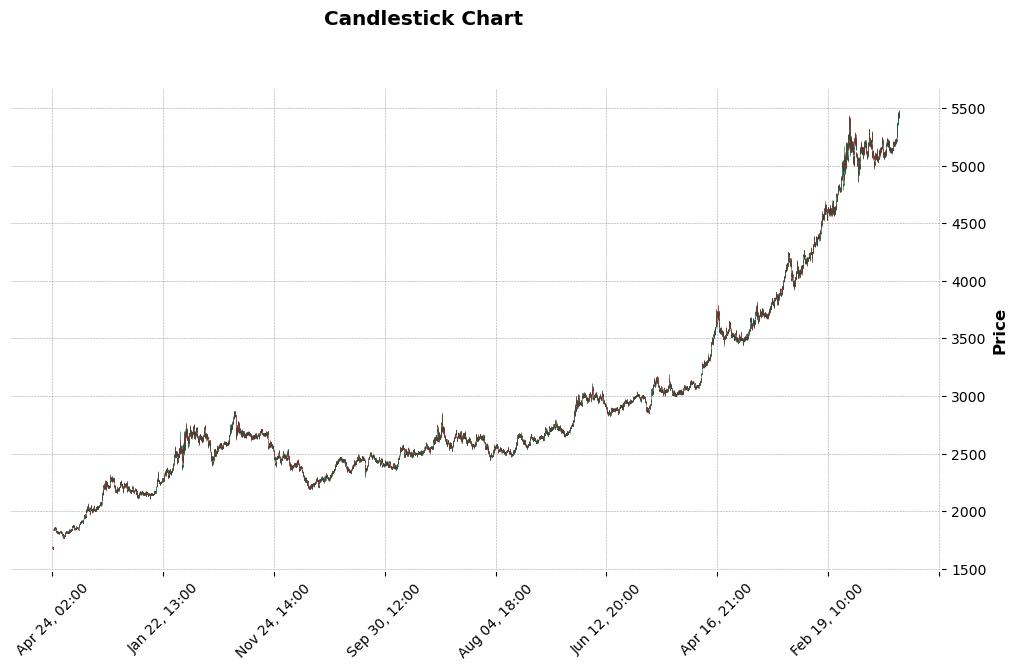

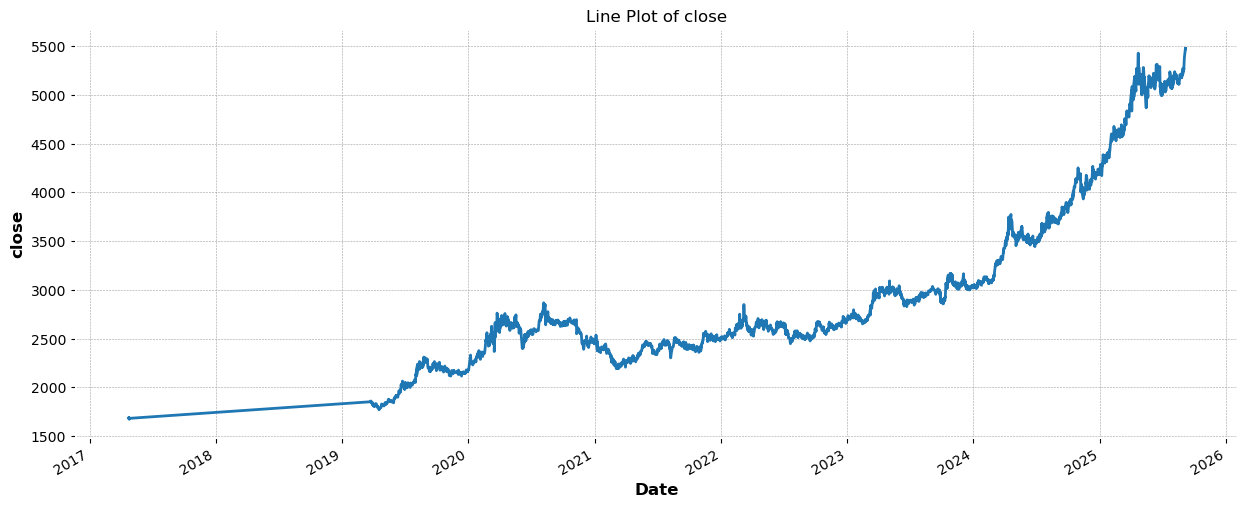

DATASET SUMMARY
Total Rows: 38217
Total Columns: 5
Date Range: 2017-04-24 01:00:00 to 2025-09-05 20:00:00
Numeric Columns: ['open', 'high', 'low', 'close', 'volume']
Non Numeric Columns: []
Missing Values: 1
Duplicates: 0
Columns: Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')
Index Column: datetime


In [3]:
quick_look = ForexQuickLook( data = df, full_look = True)

In [4]:
cleaner = ForexDataClean(data = df, fast_clean = True)
df = cleaner.data

FOREX DATA CLEANER
 Available Fuctions 
1 remove_duplicates 
2 handle_missing_values 
3 validate_ohlc_integrity 
4 handle_outliers
Keep = first and subset = None
Removed 0 duplicate entries
Found 1 missing values
 dropped: 1 missing values .
OHLC DATA INTEGRITY VALIDATION
No OHLC integrity violations found
All OHLC values are consistent


In [5]:
trends = ForexTrendIndicators(data = df).get_all_trend_indicators()
trends.dropna()


TREND INDICATORS
 Available Fuctions: 
1 add_sma 
2 add_ema 
3 add_macd 
4 add_adx 
5 add_parabolic_sar 
6 add_trend_confirmation


,open,high,low,close,volume,sma_20,sma_20_slope,sma_50,sma_50_slope,sma_100,...,ema_26,ema_50,ema_50_slope,macd_line,macd_signal,macd_histogram,adx,plus_di,minus_di,parabolic_sar
datetime,,,,,,,,,,,,,,,,,,,,,
2019-03-25 08:00:00,1858.30,1859.15,1858.02,1858.37,0,1853.9015,0.4785,1847.5000,0.3598,1769.9229,...,1849.793784,1829.400748,1.182418,5.981808,6.945520,-0.963712,51.807123,30.161342,8.632179,1856.309360
2019-03-25 09:00:00,1858.37,1859.40,1857.13,1857.96,0,1854.2200,0.3185,1847.8336,0.3336,1771.6112,...,1850.398689,1830.520718,1.119971,5.712965,6.699009,-0.986043,51.521892,28.686054,10.127695,1861.030000
2019-03-25 10:00:00,1857.96,1860.14,1856.84,1858.41,0,1854.6340,0.4140,1848.1106,0.2770,1773.3185,...,1850.992120,1831.614416,1.093697,5.473127,6.453833,-0.980706,51.414961,28.240650,9.407310,1860.952000
2019-03-25 11:00:00,1858.41,1858.52,1856.21,1858.28,0,1854.9475,0.3135,1848.3650,0.2544,1775.0177,...,1851.531963,1832.660125,1.045709,5.212477,6.205561,-0.993085,50.914978,26.803418,10.316522,1860.787520
2019-03-25 12:00:00,1858.28,1858.31,1856.01,1857.53,0,1855.4010,0.4535,1848.6364,0.2714,1776.7224,...,1851.976262,1833.635414,0.975289,4.889033,5.942256,-1.053223,50.320507,25.416446,10.232649,1860.512869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-05 16:00:00,5447.51,5456.26,5433.22,5455.01,0,5438.7805,-0.0580,5435.8618,0.8922,5396.5852,...,5436.716585,5427.020285,1.142437,1.618773,1.085136,0.533637,15.971064,26.705218,16.867883,5416.314800
2025-09-05 17:00:00,5454.84,5474.80,5451.73,5474.64,0,5440.4165,1.6360,5436.9340,1.0722,5398.2257,...,5439.525727,5428.887725,1.867440,4.394961,1.747101,2.647860,17.384413,32.077099,15.179211,5417.328904
2025-09-05 18:00:00,5474.54,5477.82,5459.37,5468.49,0,5441.6360,1.2195,5437.7528,0.8188,5399.7764,...,5441.671228,5430.440755,1.553030,6.029353,2.603551,3.425802,18.829879,30.830188,13.974317,5419.627748


In [6]:
ts_features = ForexTSFeatures(data = trends.tail(240), target_column = 'close' )

TSFRESH FEATURE ENGINEERING
 Available Functions: 
1 prepare_ts_data 
2 extract_ts_features 
3 select_relevant_features 
4 get_feature_importance 
5 get_train_test_split 
6 get_all_features


In [7]:
#ts_features.prepare_ts_data()

In [8]:
#ts_features.extract_ts_features()

In [9]:
#ts_features.select_relevant_features()

In [10]:
#ts_features.get_feature_importance()

In [11]:
#ts_features.check_leakage()

In [12]:
X_train, X_test, y_train, y_test = ts_features.get_all_features()

Rolling: 100%|██████████| 20/20 [00:02<00:00,  8.75it/s]


Using comprehensive feature settings


Feature Extraction: 100%|██████████| 20/20 [00:55<00:00,  2.76s/it]


Selecting relevant features...
Aligned data: 230 samples
Target range: 5174.7400 to 5461.0500
X index: [Timestamp('2025-08-22 09:00:00'), Timestamp('2025-08-22 10:00:00'), Timestamp('2025-08-22 11:00:00'), Timestamp('2025-08-22 12:00:00'), Timestamp('2025-08-22 13:00:00')]
y index: [Timestamp('2025-08-22 09:00:00'), Timestamp('2025-08-22 10:00:00'), Timestamp('2025-08-22 11:00:00'), Timestamp('2025-08-22 12:00:00'), Timestamp('2025-08-22 13:00:00')]
Indices match: True
Selected 6397 relevant features
 Top feature correlations:
   1. tsfresh_high__quantile__q_0.8: 0.9951 (+)
   2. tsfresh_ema_12__quantile__q_0.9: 0.9944 (+)
   3. tsfresh_open__quantile__q_0.8: 0.9942 (+)
   4. tsfresh_low__quantile__q_0.8: 0.9941 (+)
   5. tsfresh_sma_20__maximum: 0.9937 (+)
   6. tsfresh_sma_20__absolute_maximum: 0.9937 (+)
   7. tsfresh_ema_12__mean_n_absolute_max__number_of_maxima_7: 0.9937 (+)
   8. tsfresh_sma_20__agg_linear_trend__attr_"intercept"__chunk_len_50__f_agg_"max": 0.9931 (+)
   9. tsfre

In [13]:
X_train.head()

,tsfresh_ema_12__quantile__q_0.9,tsfresh_ema_12__quantile__q_0.8,tsfresh_ema_26__quantile__q_0.9,tsfresh_ema_26__quantile__q_0.8,tsfresh_ema_12__quantile__q_0.7,tsfresh_ema_12__quantile__q_0.6,tsfresh_open__quantile__q_0.8,tsfresh_open__c3__lag_3,tsfresh_ema_12__median,tsfresh_open__c3__lag_2,...,"tsfresh_sma_50_slope__fft_coefficient__attr_""real""__coeff_15","tsfresh_high__cwt_coefficients__coeff_10__w_10__widths_(2, 5, 10, 20)",tsfresh_sma_50_slope__fourier_entropy__bins_2,"tsfresh_sma_50__cwt_coefficients__coeff_6__w_20__widths_(2, 5, 10, 20)","tsfresh_macd_signal__agg_autocorrelation__f_agg_""median""__maxlag_40",tsfresh_macd_histogram__first_location_of_maximum,tsfresh_sma_50__autocorrelation__lag_1,tsfresh_macd_line__energy_ratio_by_chunks__num_segments_10__segment_focus_3,"tsfresh_low__cwt_coefficients__coeff_10__w_10__widths_(2, 5, 10, 20)",tsfresh_sma_50__partial_autocorrelation__lag_1
2025-08-22 09:00:00,-0.909562,-0.887923,-0.856181,-0.854639,-0.886780,-0.887387,-0.922331,-0.937856,-0.886511,-0.929516,...,1.461582,0.256538,4.122073,0.051301,-2.189254,1.123319,-3.753406,0.307866,0.253135,-3.753406
2025-08-22 10:00:00,-0.903952,-0.882110,-0.858060,-0.855489,-0.874712,-0.882918,-0.871121,-0.919470,-0.883674,-0.921479,...,1.461582,0.986929,4.026084,0.382961,-1.599214,1.150574,-2.940192,0.445630,0.984815,-2.940192
2025-08-22 11:00:00,-0.890328,-0.876607,-0.859082,-0.851818,-0.866328,-0.876052,-0.854210,-0.903007,-0.880837,-0.907828,...,1.461582,1.575386,3.232616,0.700163,-0.299118,1.173636,-2.560493,1.510940,1.574262,-2.560493
2025-08-22 12:00:00,-0.884392,-0.866871,-0.857567,-0.845597,-0.860765,-0.864390,-0.850042,-0.897330,-0.876620,-0.889435,...,1.461582,2.197795,2.895738,1.097432,0.574386,1.193403,-2.532203,3.374429,2.197263,-2.532203
2025-08-22 13:00:00,-0.875924,-0.855485,-0.857726,-0.838919,-0.855545,-0.856883,-0.845129,-0.883142,-0.872402,-0.874334,...,1.461582,2.662214,2.895738,1.373974,0.724620,0.970692,-2.416963,3.304072,2.662145,-2.416963


In [14]:
X_train.shape

(184, 6397)

In [15]:
240-184

56